## Caution!

We are not being formals at the moment of use equations and generate figures. Some figures will only be used to show definitions of optical microcavities like full width at half maximum, optical quality factors and dispersion.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import transforms as mtransforms
from sympy import symbols, sqrt, diff, lambdify, Abs
from scipy import constants

from SettingPLOTs import *

π = constants.pi
c = constants.c

pathfig = '/home/marvyn/GDrive/marvyn.inga@gmail.com/LPD_IFGW_UNICAMP/PhD-jupyter-notebooks/Figures/'

## Cavity transmission:

$$T(\omega) = 1 + \sum_{j=1}^{N}\frac{4 \eta_j (\eta_j-1)\kappa_j^2}{\kappa_j^2 + 4(\omega-\omega_j)^2}$$

$$T(\nu) = 1 + \sum_{j=1}^{N}\frac{4 \eta_j (\eta_j-1)\kappa_j^{*2}}{\kappa_j^{*2} + 4(\nu-\nu_j)^2} \hspace{0.5cm}, \hspace{0.5cm} \kappa_j^{*} = \frac{\kappa_j}{2\pi}$$

where $N$ is the number of resonances and ($\omega_j$, $\nu_j$, $\eta_j$, $\kappa_j$) corresponde to each resonance.

In [2]:
def Transmission(ν, νj, ηj, κj):
    """
    All input parameters are vectors.
    Return the cavity normalized transmission.
    """
    T = 1
    for νj, ηj, κj in zip(νj, ηj, κj):
        T = T + 4*ηj*(ηj-1)*κj**2 / (κj**2 + 4*(ν-νj)**2)
    return T

### 1 peak

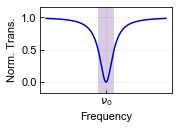

In [3]:
νi, νf, step = 192, 198, 1e-2 # Frequency in THz

ν = np.arange(νi, νf, step)

N = 1 # Number of resonances
νj = [(νf+νi)/2]
ηj = [0.5]
κj = [0.8]

fig, ax = plt.subplots(figsize=cm2inch(6,4))

T = Transmission(ν,νj,ηj,κj)
ax.plot(ν, T, c='mediumblue')

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(ν, -0.1, 1.1, where=T<=0.5, facecolor='indigo', alpha=0.2, transform=trans)

ax.set_xlabel('Frequency')
ax.set_ylabel('Norm. Trans.')

plt.xticks(νj, [r'$ν_0$'])
# plt.savefig(pathfig+'Cavity-transmission-1-peak.svg')
plt.show()

### 2 peaks

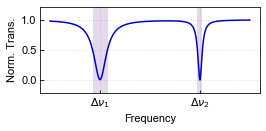

In [4]:
νi, νf, step = 190, 210, 1e-2 # Frequency in THz

ν = np.arange(νi, νf, step)

N = 2 # Number of resonances
δ = 5 # Avoid peaks in the extremes of the intervale of frequencies.
νj = np.linspace(νi+δ, νf-δ, N)
ηj = [0.5, 0.5] # We are choosing the same ηj for all resonances.
κj = [1.5, 0.5] # We are choosing the same κj for all resonances.

label = []
for ii in range(N):
    label.append(r'$Δν_{}$'.format(ii+1))

fig, ax = plt.subplots(figsize=cm2inch(10,4))

T = Transmission(ν,νj,ηj,κj)
ax.plot(ν, T, c='mediumblue')

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(ν, -0.15, 1.15, where=T<=0.5, facecolor='indigo', alpha=0.15, transform=trans)

ax.set_xlabel('Frequency')
ax.set_ylabel('Norm. Trans.')
# ax.set_yticks([])

plt.xticks(νj, label)
# plt.savefig(pathfig+'Cavity-transmission-2-peaks.svg')
plt.show()

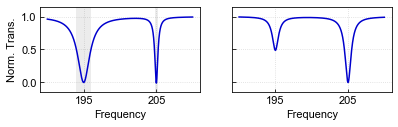

In [225]:
νi, νf, step = 190, 210, 1e-2 # Frequency in THz

ν = np.arange(νi, νf, step)

N = 2 # Number of resonances
δ = 5 # Avoid peaks in the extremes of the intervale of frequencies.
νj = np.linspace(νi+δ, νf-δ, N)

label = []
for ii in range(N):
    label.append(r'$Δν_{}$'.format(ii+1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=cm2inch(16,4), sharey=True)
#----------------
ηj = 0.5*np.ones(N) # We are choosing the same ηj for all resonances.
κj = [2, 0.5] # We are choosing a different κj for each resonances.
T = Transmission(ν,νj,ηj,κj)

trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
ax1.fill_between(ν, -0.15, 1.15, where=T<=0.5, facecolor='gray', alpha=0.15, transform=trans)
ax1.plot(ν, T, c='mediumblue')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Norm. Trans.')
ax1.set_xticks(νj)

#----------------
ηj = [0.15, 0.5] # We are choosing the same ηj for all resonances.
κj = np.ones(N) # We are choosing a different κj for each resonances.
T = Transmission(ν,νj,ηj,κj)

ax2.plot(ν, T, c='mediumblue')
ax2.set_xlabel('Frequency')
ax2.set_xticks(νj)
ax2.set_ylim(-0.15, 1.15)
# plt.savefig(pathfig+'Cavity-transmission_2-peaks_changing-κ-and-η.svg')
plt.show()

### 3 peaks

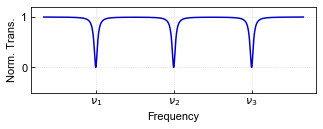

In [5]:
νi, νf, step = 190, 210, 1e-2 # Frequency in THz

ν = np.arange(νi, νf, step)

N = 3 # Number of resonances
δ = 4 # Avoid peaks in the extremes of the intervale of frequencies.
νj = np.linspace(νi+δ, νf-δ, N)
ηj = 0.5*np.ones(N) # We are choosing the same ηj for all resonances.
κj = 0.3*np.ones(N) # We are choosing the same κj for all resonances.

label = []
for ii in range(N):
    label.append(r'$ν_{}$'.format(ii+1))

fig, ax = plt.subplots(figsize=cm2inch(13,4))

T = Transmission(ν,νj,ηj,κj)
ax.plot(ν, T, c='mediumblue')

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.set_xlabel('Frequency')
ax.set_ylabel('Norm. Trans.')
ax.set_ylim(-0.5, 1.2)

plt.xticks(νj, label)
# plt.savefig(pathfig+'Cavity-transmission_3-peaks.svg')
plt.show()

## Microsphere eccentricity splitting:

$$\frac{\Delta\omega_\text{ecc}}{\omega_{nlm}} = -\frac{\epsilon}{6}\left(1-3\frac{|m|^2}{l(l+1)}\right)$$

#### Dispersion/Sellmeier formula for silica:

In [6]:
B1, B2, B3 = 0.6961663, 0.4079426, 0.8974794
C1, C2, C3 = 68.4043, 116.2414, 9896.161 # in nm

λ = symbols('λ')
n = sqrt(1+(B1*λ**2)/(λ**2-C1**2)+(B2*λ**2)/(λ**2-C2**2)+(B3*λ**2)/(λ**2-C3**2))
ng = n - λ*diff(n, λ)

n.subs([(λ, 1550)])

1.44402362170326

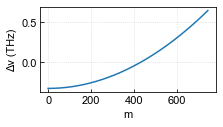

In [159]:
def Splitting(R, ϵ, ν0):
    """
    ϵ is the excentricty of the microsphere, can be oblate (ϵ>0) or prolate (ϵ<0)
    R is the microsphere radius [m]
    ν0 is the ressonance frequency [THz]
    """
    λ0 = 1e-3*c/ν0 # In nm
    ng0 = ng.subs([(λ, λ0)])
    fsr = 1e-12*c/2/π/ng0/R # In THz
    l = int(ν0/fsr)
    ν0m = []
    for m in range(l):
        ν0m.append(-ν0*(ϵ/6)*(1-3*m**2/l/(l+1)))
    return l, ν0m

ν0 = 195
l, Δνm = Splitting(125e-6, 0.01, ν0)

plt.figure(figsize=cm2inch(8,4))
plt.plot(np.arange(l), Δνm)
plt.xlabel('m')
plt.ylabel('Δν (THz)')
plt.show()

### Splitting between modes with successive azimuthal mode number

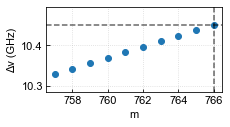

In [164]:
def split(R, ϵ, ν0, N=10):
    """
    ϵ is the excentricty of the microsphere, can be oblate (ϵ>0) or prolate (ϵ<0)
    R is the microsphere radius [m]
    ν0 is the ressonance frequency [THz]
    """
    λ0 = 1e-3*c/ν0 # In nm
    ng0 = ng.subs([(λ, λ0)])
    fsr = 1e-12*c/2/π/ng0/R # In THz
    l = int(ν0/fsr)
    Δν = []
    for m in range(l, l-N, -1):
        Δν.append(1e3*ν0*ϵ*(m+1/2)/l**2)
    return l, Δν

ϵ = 0.04 # Eccentricity around 10%
R = 125e-6
ν0 = 200
N = 10
l, Δνl = split(R, ϵ, ν0)
plt.figure(figsize=cm2inch(8,4))
plt.scatter(range(l, l-N, -1), Δνl)
plt.axvline(x=l, ymin=0, ymax=1, c='k', ls='--', alpha=0.6)
plt.axhline(y=Δνl[0], xmin=0, xmax=1, c='k', ls='--', alpha=0.6)
plt.xlabel('m')
plt.ylabel('Δν (GHz)')
plt.show()

In conclusion, if we have an sphere with ϵ=4%, the mode with m=l-1 will appear ~10.45 GHz from the equatorial mode.